# Classification dengan KNN (K Nearest Neighbours)

In [ ]:
# KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tertangga terdekat
# prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression task

In [2]:
import pandas as pd

sensus = {'tinggi': [158,170,183,191,155,163,180,158,178],
          'berat': [64,86,84,80,49,59,67,54,67],
          'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


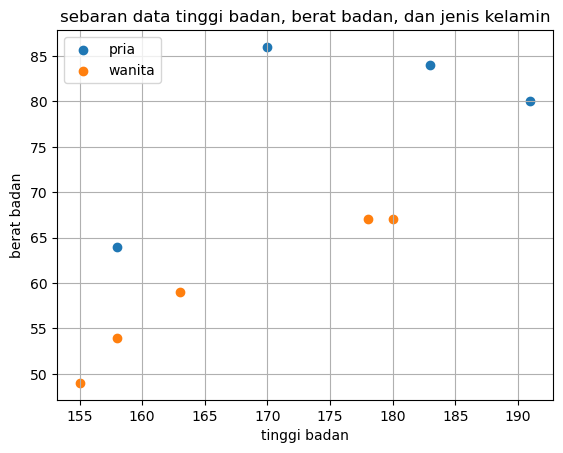

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'): ax.scatter(d['tinggi'], d['berat'], label = jk)
    
plt.legend(loc='upper left')
plt.title('sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan')
plt.ylabel('berat badan')
plt.grid(True)

plt.show()

In [5]:
import numpy as np

x_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'x_train: {x_train}')
print(f'y_train: {y_train}')

x_train: [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]
y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train= lb.fit_transform(y_train)

print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [8]:
y_train = y_train.flatten()

print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [11]:
# training KNN classification model

from sklearn.neighbors import KNeighborsClassifier as KNN

k = 3
model = KNN(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
tinggi = 155
berat = 70
x_new = np.array([tinggi, berat]).reshape(1,-1)

x_new

array([[155,  70]])

In [13]:
y_new = model.predict(x_new)
y_new

array([1])

In [14]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

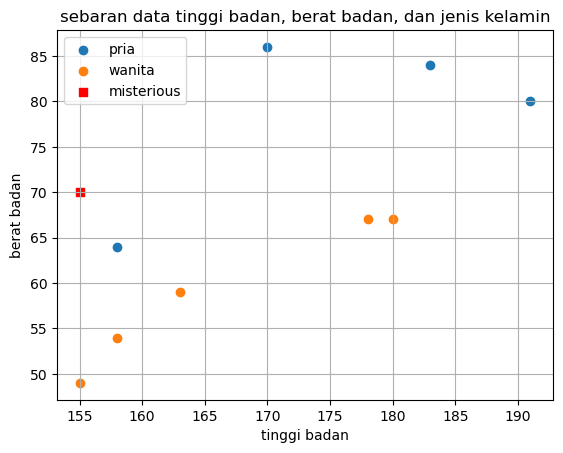

In [15]:
# visualisasi nearest neighbours

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'): ax.scatter(d['tinggi'], d['berat'], label = jk)
   
plt.scatter(tinggi, berat, marker='s', color = 'red', label = 'misterious')

plt.legend(loc='upper left')
plt.title('sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan')
plt.ylabel('berat badan')
plt.grid(True)

plt.show()

In [16]:
# kalkulasi auclidean distance

misterious = np.array([tinggi, berat])
misterious

array([155,  70])

In [17]:
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [18]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterious,d) for d in x_train]

data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [19]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [21]:
x_test = np.array([[168,65], [180,96], [160,52], [169,67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print (f'x_test: {x_test}')
print(f'y_test: {y_test}')

x_test: [[168  65]
 [180  96]
 [160  52]
 [169  67]]
y_test: [0 0 1 1]


In [22]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [23]:
# accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print (f'accuracy: {acc}')

accuracy: 0.75


In [24]:
#  precission

from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print (f'precission: {prec}')

precission: 0.6666666666666666


In [25]:
# recall

from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print (f'recall: {rec}')

recall: 1.0


In [26]:
# f1 score

from sklearn.metrics import f1_score

f1= f1_score(y_test, y_pred)

print(f'f1 score: {f1}')

f1 score: 0.8


In [27]:
# classification report

from sklearn.metrics import classification_report

clas_report = classification_report(y_test, y_pred)

print(f'classification report: {clas_report}')

classification report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [28]:
#  matthews correlation coefficient

from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'mcc: {mcc}')

mcc: 0.5773502691896258
